Purpose: Re-run exploratory analyses (PCA, hierarchical clustering) for all 1823 samples processed as of May 5, 2023.<br>
Author: Anna Pardo<br>
Date initiated: May 5, 2023

In [2]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
# load TPM matrix
tpm = pd.read_csv("../../01_data/TPM_LS_allsamp_05-May-2023.txt",sep="\t",header="infer",index_col="GeneID")
tpm.head()

,SRR8857799,SRR8857793,SRR15241108,SRR15241156,SRR8857749,SRR8857746,SRR15241170,SRR8857844,SRR9282931,SRR2106196,...,SRR11933010,SRR11933188,SRR11933232,SRR11933226,SRR11933391,SRR11933084,SRR11932980,SRR4431530,SRR11933278,SRR11933248
GeneID,,,,,,,,,,,,,,,,,,,,,
Zm00001eb000010,8.477884,1.349336,15.116249,13.781893,4.872421,32.421567,13.266106,10.918767,1.099232,5.291619,...,5.045644,15.304726,9.054337,8.371502,6.884535,23.167063,10.531549,1.939595,3.661932,12.195099
Zm00001eb000020,102.011193,39.493900,0.808690,0.565147,13.808307,1.344191,1.035099,124.754873,45.137300,18.872878,...,1.329592,3.608441,0.926072,3.874467,3.166363,3.762337,0.231235,0.000000,0.767166,2.757692
Zm00001eb000050,0.492838,0.000000,0.000000,0.000000,0.519128,2.733165,0.000000,1.152023,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.999909,0.000000,0.000000,0.076395,0.000000
Zm00001eb000060,28.480082,7.311609,35.563727,18.684174,7.134804,28.603220,22.302009,34.742011,2.411356,4.794730,...,2.380904,12.338421,6.851312,10.411906,3.112488,19.269589,0.000000,1.254026,5.877407,14.959614
Zm00001eb000070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360438,...,11.307018,12.758565,1.048543,10.708364,2.937489,3.235341,2.842873,0.000000,12.544630,2.985126


In [5]:
# define a function from an answer in https://stackoverflow.com/questions/39812885/retain-feature-names-after-scikit-feature-selection
def variance_threshold_selector(data):
    selector = VarianceThreshold()
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [6]:
# transpose TPM data
ttpm = tpm.transpose()
ttpm.head()

GeneID,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442910,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
SRR8857799,8.477884,102.011193,0.492838,28.480082,0.0,25.786615,0.390458,0.0,1.041538,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.267260,0.0,0.0,0.000000
SRR8857793,1.349336,39.493900,0.000000,7.311609,0.0,14.504660,1.032018,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,5.135086,0.0,0.0,0.000000
SRR15241108,15.116249,0.808690,0.000000,35.563727,0.0,10.080573,0.000000,0.0,0.288952,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.480562,0.0,0.0,0.000000
SRR15241156,13.781893,0.565147,0.000000,18.684174,0.0,9.818174,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.228073,0.0,0.0,0.0,0.413354,0.0,0.0,0.880361
SRR8857749,4.872421,13.808307,0.519128,7.134804,0.0,4.857101,0.094921,0.0,0.381624,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.021196,0.0,0.0,0.000000


In [7]:
# put through VarianceThreshold() using the variance_threshold_selector() defined above
vttpm = variance_threshold_selector(ttpm)
vttpm.head()

GeneID,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442910,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
SRR8857799,8.477884,102.011193,0.492838,28.480082,0.0,25.786615,0.390458,0.0,1.041538,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.267260,0.0,0.0,0.000000
SRR8857793,1.349336,39.493900,0.000000,7.311609,0.0,14.504660,1.032018,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,5.135086,0.0,0.0,0.000000
SRR15241108,15.116249,0.808690,0.000000,35.563727,0.0,10.080573,0.000000,0.0,0.288952,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.480562,0.0,0.0,0.000000
SRR15241156,13.781893,0.565147,0.000000,18.684174,0.0,9.818174,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.228073,0.0,0.0,0.0,0.413354,0.0,0.0,0.880361
SRR8857749,4.872421,13.808307,0.519128,7.134804,0.0,4.857101,0.094921,0.0,0.381624,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.021196,0.0,0.0,0.000000


In [8]:
# find how many low-variance genes were eliminated
len(ttpm.columns)-len(vttpm.columns)

31

In [9]:
vttpm_log = vttpm.apply(lambda x: np.log2(x+1))
vttpm_log.head()

GeneID,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442910,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
SRR8857799,3.244565,6.686657,0.578058,4.881669,0.0,4.743440,0.475560,0.0,1.029656,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.341713,0.0,0.0,0.00000
SRR8857793,1.232253,5.339633,0.000000,3.055128,0.0,3.954630,1.022913,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,2.617084,0.0,0.0,0.00000
SRR15241108,4.010444,0.854945,0.000000,5.192341,0.0,3.469961,0.000000,0.0,0.366199,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.566145,0.0,0.0,0.00000
SRR15241156,3.885759,0.646298,0.000000,4.298964,0.0,3.435385,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.296396,0.0,0.0,0.0,0.499123,0.0,0.0,0.91101
SRR8857749,2.553955,3.888335,0.603243,3.024108,0.0,2.550187,0.130827,0.0,0.466365,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.015209,0.0,0.0,0.00000


In [10]:
pca = PCA(n_components=2)
real_PCs = pca.fit_transform(vttpm_log)
real_PCs_df = pd.DataFrame(data = real_PCs, columns = ['PC1','PC2'])

In [11]:
# find the explained variance ratio
pca.explained_variance_ratio_

array([0.29381741, 0.13521298])

In [12]:
## reset index (after running PCA)
vttpm_log.reset_index(inplace=True)
vttpm_log.head()

GeneID,index,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442910,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR8857799,3.244565,6.686657,0.578058,4.881669,0.0,4.743440,0.475560,0.0,1.029656,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.341713,0.0,0.0,0.00000
1,SRR8857793,1.232253,5.339633,0.000000,3.055128,0.0,3.954630,1.022913,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,2.617084,0.0,0.0,0.00000
2,SRR15241108,4.010444,0.854945,0.000000,5.192341,0.0,3.469961,0.000000,0.0,0.366199,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.566145,0.0,0.0,0.00000
3,SRR15241156,3.885759,0.646298,0.000000,4.298964,0.0,3.435385,0.000000,0.0,0.000000,...,0.0,0.0,0.296396,0.0,0.0,0.0,0.499123,0.0,0.0,0.91101
4,SRR8857749,2.553955,3.888335,0.603243,3.024108,0.0,2.550187,0.130827,0.0,0.466365,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.015209,0.0,0.0,0.00000


In [13]:
# load metadata
md = pd.read_csv("../../01_data/srr_numbers_with_metadata_14-Apr-2023.tsv",sep="\t",header="infer")
md.head()

,BioProject,SRA_number,sample_name,Replicate_num,Genotype,Technology,Library_layout,Treatment,Duration_hours,Time_after_treatment,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
0,PRJNA637522,SRR11933261,238_WS2,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,312.0,13 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
1,PRJNA637522,SRR11933272,238_WS1,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
2,PRJNA637522,SRR11933250,268_WS1,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
3,PRJNA637522,SRR11933029,268_WW,NaN,268,Illumina HiSeq 2500,PAIRED,Control,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
4,PRJNA637522,SRR11933040,268_WS2,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,312.0,13 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN


In [14]:
# in vttpm_log, rename column "index" to "SRA_number"
vttpm_log.rename(columns={"index":"SRA_number"},inplace=True)
vttpm_log.head()

GeneID,SRA_number,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442880,Zm00001eb442890,Zm00001eb442910,Zm00001eb442940,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR8857799,3.244565,6.686657,0.578058,4.881669,0.0,4.743440,0.475560,0.0,1.029656,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.341713,0.0,0.0,0.00000
1,SRR8857793,1.232253,5.339633,0.000000,3.055128,0.0,3.954630,1.022913,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,2.617084,0.0,0.0,0.00000
2,SRR15241108,4.010444,0.854945,0.000000,5.192341,0.0,3.469961,0.000000,0.0,0.366199,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.566145,0.0,0.0,0.00000
3,SRR15241156,3.885759,0.646298,0.000000,4.298964,0.0,3.435385,0.000000,0.0,0.000000,...,0.0,0.0,0.296396,0.0,0.0,0.0,0.499123,0.0,0.0,0.91101
4,SRR8857749,2.553955,3.888335,0.603243,3.024108,0.0,2.550187,0.130827,0.0,0.466365,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.015209,0.0,0.0,0.00000


In [15]:
# merge with metadata
## note this has to maintain the sample order of vttpm_log, otherwise when we concatenate it with the PC df everything will be
## incorrectly matched up
vttpm_log_merged = vttpm_log.merge(md,how="inner")
vttpm_log_merged.head()

,SRA_number,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
0,SRR8857799,3.244565,6.686657,0.578058,4.881669,0.0,4.743440,0.475560,0.0,1.029656,...,V3,Stalk,14.0,38.0,NaN,65,NaN,Phytotron,NaN,NaN
1,SRR8857793,1.232253,5.339633,0.000000,3.055128,0.0,3.954630,1.022913,0.0,0.000000,...,V3,Root,14.0,25.0,NaN,65,NaN,Phytotron,NaN,NaN
2,SRR15241108,4.010444,0.854945,0.000000,5.192341,0.0,3.469961,0.000000,0.0,0.366199,...,V2/V3,Leaf,16.0,30.0,20.0,NaN,NaN,NaN,NaN,NaN
3,SRR15241156,3.885759,0.646298,0.000000,4.298964,0.0,3.435385,0.000000,0.0,0.000000,...,V2/V3,Leaf,16.0,39.0,29.0,NaN,NaN,NaN,NaN,NaN
4,SRR8857749,2.553955,3.888335,0.603243,3.024108,0.0,2.550187,0.130827,0.0,0.466365,...,R1,Tassel,14.0,38.0,NaN,65,NaN,Phytotron,NaN,NaN


In [16]:
# append metadata to PCA df
plotdf = pd.concat([real_PCs_df,vttpm_log_merged[["BioProject","Genotype","Treatment","Time_after_treatment","Concentration",
                                                 "Developmental_stage","Tissue","Day_length_hours","Day_temp_C","Night_temp_C",
                                                 "Relative humidity (%)","Light (umol/m2/s)","Growth Env.","Media"]]],axis=1)
plotdf.head()

,PC1,PC2,BioProject,Genotype,Treatment,Time_after_treatment,Concentration,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media
0,164.182174,-30.777817,PRJNA520822,B73,Heat,2 hours,NaN,V3,Stalk,14.0,38.0,NaN,65,NaN,Phytotron,NaN
1,213.331174,-7.675341,PRJNA520822,B73,Control,0 hour,NaN,V3,Root,14.0,25.0,NaN,65,NaN,Phytotron,NaN
2,-102.052490,32.552225,PRJNA747925,B73,Control,25 hours,NaN,V2/V3,Leaf,16.0,30.0,20.0,NaN,NaN,NaN,NaN
3,-99.627029,44.029090,PRJNA747925,B73,Heat,1 hour,NaN,V2/V3,Leaf,16.0,39.0,29.0,NaN,NaN,NaN,NaN
4,-7.307030,43.023382,PRJNA520822,B73,Heat,2 hours,NaN,R1,Tassel,14.0,38.0,NaN,65,NaN,Phytotron,NaN


Text(0.5, 1.0, 'By Growth Media')

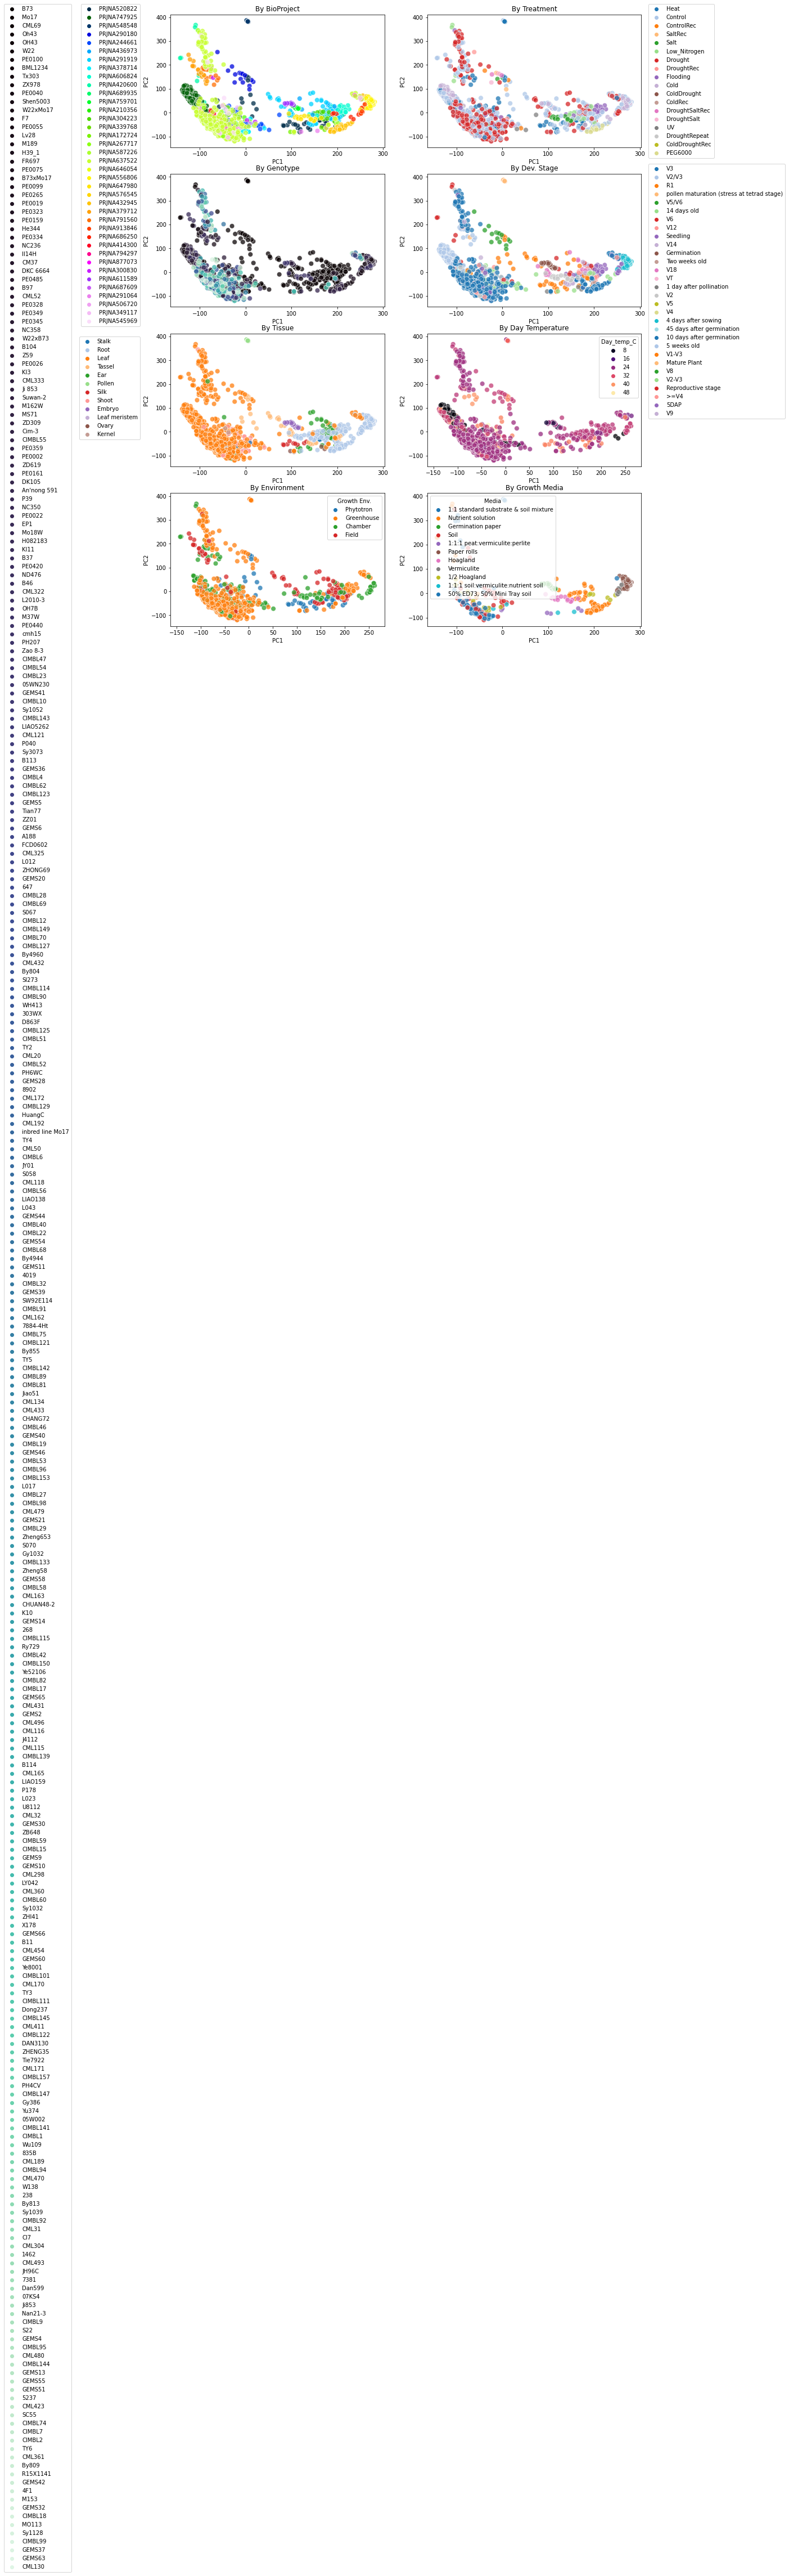

In [26]:
# make subplots & color by different things: BioProject, treatment, day temperature, dev stage, growth env, tissue, 
## genotype

fig,ax = plt.subplots(nrows=4,ncols=2,figsize = (15,20))

a = sns.scatterplot(ax=ax[0,0],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["BioProject"],palette="gist_ncar",s=75,alpha=0.75)
a.set_title("By BioProject",fontsize=12)
a.legend(bbox_to_anchor=(-0.13,1.1))
b = sns.scatterplot(ax=ax[0,1],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Treatment"],palette="tab20",s=75,alpha=0.75)
b.set_title("By Treatment",fontsize=12)
b.legend(bbox_to_anchor=(1.02,1.1))
c = sns.scatterplot(ax=ax[1,0],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Genotype"],palette="mako",s=75,alpha=0.75)
c.set_title("By Genotype",fontsize=12)
c.legend(bbox_to_anchor = (-0.45,2.3))
d = sns.scatterplot(ax=ax[1,1],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Developmental_stage"],palette="tab20",s=75,alpha=0.75)
d.set_title("By Dev. Stage",fontsize=12)
d.legend(bbox_to_anchor=(1.02,1.1))
e = sns.scatterplot(ax=ax[2,0],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Tissue"],palette="tab20",s=75,alpha=0.75)
e.set_title("By Tissue",fontsize=12)
e.legend(bbox_to_anchor=(-0.13,1))
sns.scatterplot(ax=ax[2,1],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Day_temp_C"],palette="magma",s=75,alpha=0.75).set_title("By Day Temperature",fontsize=12)
sns.scatterplot(ax=ax[3,0],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Growth Env."],palette="tab10",s=75,alpha=0.75).set_title("By Environment",fontsize=12)
sns.scatterplot(ax=ax[3,1],x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Media"],palette="tab10",s=75,alpha=0.75).set_title("By Growth Media",fontsize=12)

Next: hierarchical clustering of the treatments on the first PC of log2(TPM).

In [33]:
# start with the plotdf
hclust_data = plotdf[["PC1","Treatment"]]
hclust_data.head()

,PC1,Treatment
0,164.182174,Heat
1,213.331174,Control
2,-102.052490,Control
3,-99.627029,Heat
4,-7.307030,Heat


In [34]:
# this may not be correct, but group by treatment, taking the mean of PC1, then run hierarchical clustering
hcd = hclust_data.groupby(by="Treatment",axis=0).mean()
hcd.head()

,PC1
Treatment,
Cold,63.369226
ColdDrought,-22.082882
ColdDroughtRec,-87.179080
ColdRec,-77.282625
Control,7.041764


In [35]:
# first cluster all the treatments, including combined stress and others with low or no replication
l = linkage(hcd,"ward")

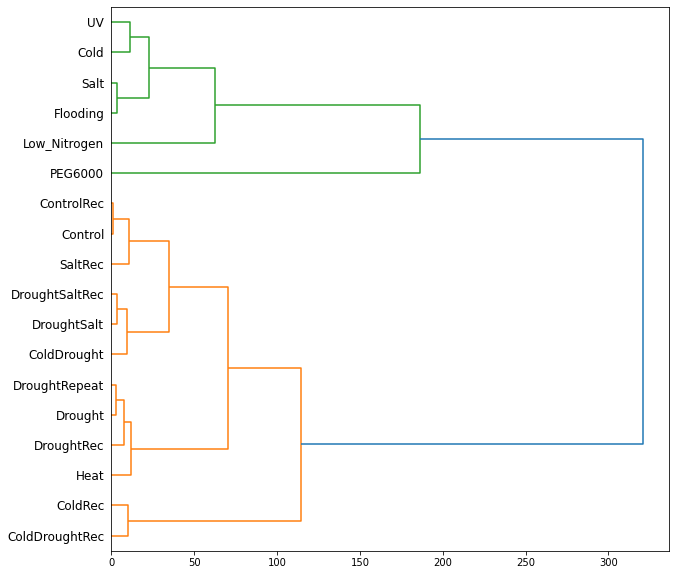

In [37]:
plt.figure(figsize=(10,10))
dendrogram(l,labels=hcd.index,orientation="right")
plt.show()

In [39]:
# now keep only certain treatments and see what happens
hclust_data_sub = hclust_data[hclust_data["Treatment"].isin(["Heat","PEG6000","Control","Salt","Drought","Low_Nitrogen",
                                                             "Flooding","Cold"])]

In [40]:
hcds = hclust_data_sub.groupby(by="Treatment",axis=0).mean()

In [41]:
k = linkage(hcds,"ward")

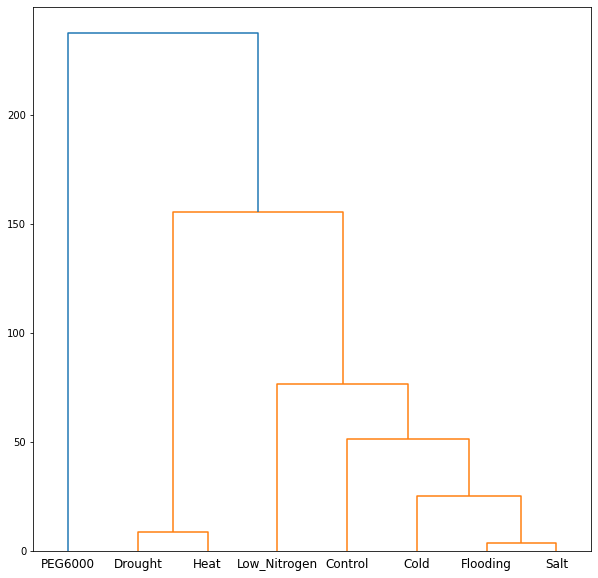

In [43]:
plt.figure(figsize=(10,10))
dendrogram(k,labels=hcds.index)
plt.show()

I don't think this is the statistically correct way to do it at all. I think I somehow need to pass PC1 calculation as a function to `groupby()`.